<a href="https://colab.research.google.com/github/williamosherson/hackathon/blob/main/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
thing = pd.read_csv('/content/drive/MyDrive/Hackathon 2025/node_data.csv')

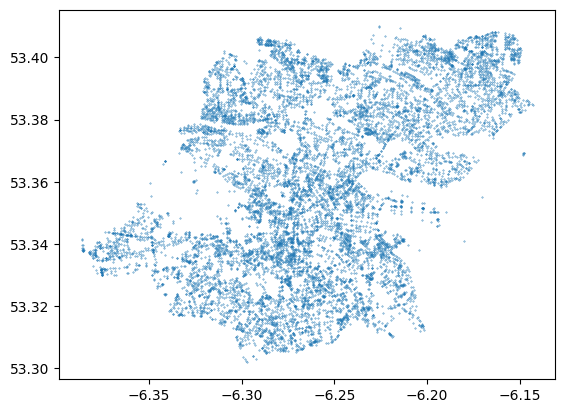

In [9]:
plt.scatter(np.array(thing['x']),np.array(thing['y']),s=0.1)

In [10]:
adj_matrix = np.load('/content/drive/MyDrive/Hackathon 2025/adj_matrix.npy')

In [11]:
adj_matrix.shape

(11565, 11565)

In [12]:
np.sum((adj_matrix.T - adj_matrix)**2)

np.float64(4170.0)

In [13]:
edges = pd.read_csv('/content/drive/MyDrive/Hackathon 2025/edges_data.csv')
nodes = pd.read_csv('/content/drive/MyDrive/Hackathon 2025/node_data.csv')



In [14]:
edges['highway'].to_list()

['secondary',
 'unclassified',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'unclassified',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'tertiary',
 'secondary',
 'unclassified',
 'secondary',
 'secondary',
 'secondary',
 'unclassified',
 'residential',
 'tertiary',
 'tertiary',
 'tertiary',
 'tertiary',
 'tertiary',
 'tertiary',
 'tertiary',
 'unclassified',
 'tertiary',
 'secondary',
 'tertiary',
 'secondary',
 'tertiary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'residential',
 'secondary',
 'secondary',
 'residential',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'unclassified',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'tertiary',
 'tertiary',
 'secondary',
 'secondary',
 'tertiary',
 'secondary',
 'secondary',
 'resident

In [15]:
for i, maxspeed in enumerate(edges['maxspeed']):
    if isinstance(maxspeed,float):
      maxspeed=31
      edges.loc[edges.index[i], 'maxspeed'] = maxspeed
    if isinstance(maxspeed, str) and '[' in maxspeed:
          # Convert the string representation of list to actual list
          speed_list = eval(maxspeed)
          # Calculate the average
          sum = 0
          for number in eval(maxspeed):
            sum +=eval(number)
          meanmaxspeed = sum/len(eval(maxspeed))
          # Update the value in the DataFrame using .loc
          edges.loc[edges.index[i], 'maxspeed'] = meanmaxspeed

#Small change for test
for i, lanes in enumerate(edges['lanes']):
    if isinstance(lanes, str) and '[' in lanes:
          # Convert the string representation of list to actual list
          lanes_list = eval(lanes)
          # Calculate the average
          sum = 0
          for number in eval(lanes):
            sum +=eval(number)
          meanlanes = sum/len(eval(lanes))
          # Update the value in the DataFrame using .loc
          edges.loc[edges.index[i], 'lanes'] = meanlanes

#Small change for test

In [16]:
edges['lanes'] = edges['lanes'].fillna(1).astype(float)
edges['maxspeed'] = edges['maxspeed'].astype(float)

In [42]:
edges['times'] = edges['length']/edges['maxspeed']
edges['lanes'] = edges['lanes'].fillna(1).astype(float)

In [43]:
edges

,u,v,key,osmid,highway,lanes,maxspeed,name,oneway,ref,reversed,length,geometry,access,tunnel,bridge,width,junction,est_width,times
0,389279,1396858852,0,"[1288830596, 292236197, 1179644327, 1179644328...",secondary,2.0,40.0,Essex Quay,True,R148,False,158.294118,"LINESTRING (-6.2676306 53.3453413, -6.2677528 ...",NaN,NaN,NaN,NaN,NaN,NaN,3.957353
1,389281,26165090,0,14039949,unclassified,1.0,30.0,York Street,True,NaN,False,108.266539,"LINESTRING (-6.2658639 53.3395894, -6.2657387 ...",NaN,NaN,NaN,NaN,NaN,NaN,3.608885
2,389281,135109542,0,532427444,secondary,3.0,30.0,Aungier Street,False,R114,False,100.237245,"LINESTRING (-6.2658639 53.3395894, -6.2658319 ...",NaN,NaN,NaN,NaN,NaN,NaN,3.341241
3,389281,2384200130,0,532427444,secondary,3.0,30.0,Aungier Street,False,R114,True,118.188046,"LINESTRING (-6.2658639 53.3395894, -6.2659031 ...",NaN,NaN,NaN,NaN,NaN,NaN,3.939602
4,389292,3594514232,0,"[506780985, 3789703]",secondary,4.0,50.0,Beresford Place,True,R105,False,42.481342,"LINESTRING (-6.2549447 53.3482797, -6.2549462 ...",NaN,NaN,NaN,NaN,NaN,NaN,0.849627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,13042760002,11675734,0,1419362186,secondary,2.0,50.0,Blackhorse Avenue,False,R806,False,25.770704,"LINESTRING (-6.3144477 53.3631943, -6.3143639 ...",NaN,NaN,NaN,NaN,NaN,NaN,0.515414
26725,13042760003,12428373,0,7989948,unclassified,1.0,30.0,NaN,False,NaN,True,27.929939,"LINESTRING (-6.3145391 53.363134, -6.3146157 5...",NaN,NaN,NaN,NaN,NaN,NaN,0.930998
26726,13042760003,13042760002,0,1419350433,unclassified,1.0,30.0,NaN,True,NaN,False,9.205259,"LINESTRING (-6.3145391 53.363134, -6.3145135 5...",NaN,NaN,NaN,NaN,NaN,NaN,0.306842
26727,13051535633,610303883,0,"[1420323200, 47984842]",residential,2.0,30.0,Tower View Cottages,False,NaN,"[False, True]",129.728240,"LINESTRING (-6.2760979 53.3678092, -6.2760781 ...",NaN,NaN,NaN,NaN,NaN,NaN,4.324275


In [18]:
nodes

,osmid,y,x,street_count,junction,ref,highway,railway,geometry
0,389279,53.345341,-6.267631,3,NaN,NaN,NaN,NaN,POINT (-6.2676306 53.3453413)
1,389281,53.339589,-6.265864,4,NaN,NaN,NaN,NaN,POINT (-6.2658639 53.3395894)
2,389292,53.348280,-6.254945,4,yes,J41,NaN,NaN,POINT (-6.2549447 53.3482797)
3,389302,53.340196,-6.272256,3,NaN,NaN,NaN,NaN,POINT (-6.2722556 53.3401961)
4,389303,53.339365,-6.272570,3,NaN,NaN,NaN,NaN,POINT (-6.2725703 53.3393653)
...,...,...,...,...,...,...,...,...,...
11560,13013917422,53.334421,-6.243880,3,NaN,NaN,NaN,NaN,POINT (-6.2438802 53.3344211)
11561,13042760002,53.363194,-6.314448,3,NaN,NaN,NaN,NaN,POINT (-6.3144477 53.3631943)
11562,13042760003,53.363134,-6.314539,3,NaN,NaN,NaN,NaN,POINT (-6.3145391 53.363134)
11563,13051535633,53.367809,-6.276098,1,NaN,NaN,turning_circle,NaN,POINT (-6.2760979 53.3678092)


In [19]:
osmids = nodes['osmid']

In [20]:
indextoosmid=osmids.to_dict()
osmidtoindex = inverted_dict = {value: key for key, value in indextoosmid.items()}

In [21]:
from time import time_ns
time_edge_dict = {(row['u'], row['v']): row['times'] for _, row in edges.iterrows()}
lanes_edge_dict = {(row['u'], row['v']): row['lanes'] for _, row in edges.iterrows()}

In [22]:
adjacencymatrix = np.zeros((11565,11565))
for start_osmid in nodes['osmid']:
  i = osmidtoindex[start_osmid]
  for end_osmid in edges[edges['u'] == start_osmid]['v']:
    j = osmidtoindex[end_osmid]
    adjacencymatrix[i,j] += 1/(lanes_edge_dict[(start_osmid,end_osmid)]/time_edge_dict[(start_osmid,end_osmid)])

In [23]:
doubledroads = []
for i in range(11565):
  for j in range(11565):
    if adj_matrix[i,j] != 0 and adj_matrix[i,j] != 1:
      doubledroads.append((i,j))
trippledroads = []
for i in range(11565):
  for j in range(11565):
    if adj_matrix[i,j] != 0 and adj_matrix[i,j] != 1 and adj_matrix[i,j] != 2:
      trippledroads.append((i,j))

In [24]:
trippledroads

[(644, 645), (645, 644), (1170, 1171), (1171, 1170)]

In [25]:
import networkx as nx
import numpy as np
from scipy import sparse

# Create a graph from your sparse matrix
sparse_matrix = sparse.csr_matrix(adjacencymatrix)
G = nx.from_scipy_sparse_array(sparse_matrix, edge_attribute='weight')

# Let's sample 200 random nodes
k = 200
random_nodes = np.random.choice(G.nodes(), size=k, replace=False)

# Calculate partial betweenness using the sample
approx_bc = nx.betweenness_centrality_subset(
    G,
    sources=random_nodes,  # Use our random sample as sources
    targets=random_nodes,  # ...and as targets
    weight='weight',       # Use the edge weight
    normalized=False
)

# Now you have a dictionary: {node_id: approximate_bc_value}
# Sort it to find the top nodes
sorted_approx_bc = sorted(approx_bc.items(), key=lambda x: x[1], reverse=True)

print("Top 10 most central nodes (from sample):")
for i, (node, bc) in enumerate(sorted_approx_bc[:10]):
    print(f"{i+1}. Node {node}: {bc}, osmid:{indextoosmid[node]}")

Top 10 most central nodes (from sample):
1. Node 169: 5557.0, osmid:672383
2. Node 20: 4795.0, osmid:389503
3. Node 3664: 4473.0, osmid:249426901
4. Node 100: 4453.0, osmid:661474
5. Node 7570: 4432.0, osmid:1396960579
6. Node 8215: 4427.0, osmid:1508507003
7. Node 8224: 4427.0, osmid:1509385147
8. Node 11400: 4427.0, osmid:11510014394
9. Node 19: 4407.0, osmid:389501
10. Node 3125: 4407.0, osmid:241890344


In [26]:
scatsdata = pd.read_csv('SCATSMay2025.csv')
scatsdata

,End_Time,Region,Site,Detector,Sum_Volume,Avg_Volume,Weighted_Avg,Weighted_Var,Weighted_Std_Dev
0,20250526020000,CCITY,403,21,0,0,NaN,NaN,NaN
1,20250526020000,CCITY,403,22,0,0,NaN,NaN,NaN
2,20250526020000,CCITY,403,23,0,0,NaN,NaN,NaN
3,20250526020000,CCITY,403,24,0,0,NaN,NaN,NaN
4,20250526020000,CCITY,404,1,2,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12194284,20250531230000,SCITY,158,21,0,0,NaN,NaN,NaN
12194285,20250531230000,SCITY,158,22,0,0,NaN,NaN,NaN
12194286,20250531230000,SCITY,158,23,0,0,NaN,NaN,NaN
12194287,20250531230000,SCITY,158,24,0,0,NaN,NaN,NaN


In [27]:
scatsdata['Sum_Volume'].min()

0

In [28]:
trafficsignals = pd.read_csv('/content/dcc_traffic_signals_20221130.csv')
trafficsignals['SiteID'].max()

1002

In [29]:
trafficsignals

,SiteID,Site_Description_Cap,Site_Description_Lower,Region,Lat,Long,Site_Type
0,1,ABBEY ST @ MARLBOROUGH ST (LUAS),abbey st @ marlborough st (luas),CCITY,53.348754,-6.257607,SCATS Site
1,2,AMIENS ST @ SEVILLE PL,amiens st @ seville pl,CCITY,53.354711,-6.246679,SCATS Site
2,3,AMIENS ST @ TALBOT ST,amiens st @ talbot st,CCITY,53.351374,-6.250073,SCATS Site
3,4,ANNESLEY PL @ POPLAR ROW,annesley pl @ poplar row,NCITY,53.361145,-6.240513,SCATS Site
4,5,NCR @ AUGHRIM ST,ncr @ aughrim st,WCITY1,53.355797,-6.292406,SCATS Site
...,...,...,...,...,...,...,...
820,964,NORTH CIRCULAR ROAD @ TUD,north circular road @ tud,WCITY1,53.357519,-6.286843,SCATS Site
821,965,HOLE IN THE WALL / MARSFIELD BELMAYNE,hole in the wall / marsfield belmayne,DCC1,53.408150,-6.161950,SCATS Site
822,968,BRIDE ST @ BRIDE RD,bride st @ bride rd,SCITY,53.341474,-6.270088,SCATS Site
823,974,BLACKHORSE AVE @ NEPHIN RD,blackhorse ave @ nephin rd,WCITY1,53.362728,-6.311709,SCATS Site


In [30]:
# Filter scatsdata to only include sites present in trafficsignals
filtered_scatsdata = scatsdata[scatsdata['Site'].isin(trafficsignals['SiteID'])]

# Merge the filtered scatsdata with trafficsignals on the site ID
merged_data = pd.merge(filtered_scatsdata, trafficsignals, left_on='Site', right_on='SiteID', how='left')

# Create a new DataFrame with specified columns
new_df = merged_data[['SiteID', 'Lat', 'Long', 'Avg_Volume', 'Sum_Volume']]

# Group by SiteID and calculate the mean of the numerical columns
averaged_df = new_df.groupby('SiteID').mean().reset_index()

# Display the new DataFrame
display(averaged_df)

,SiteID,Lat,Long,Avg_Volume,Sum_Volume
0,1,53.348754,-6.257607,0.470165,7.649300
1,2,53.354711,-6.246679,4.023332,49.738819
2,3,53.351374,-6.250073,2.709285,33.607639
3,4,53.361145,-6.240513,1.106407,14.131384
4,5,53.355797,-6.292406,10.694220,132.421819
...,...,...,...,...,...
647,964,53.357519,-6.286843,10.659946,133.018817
648,965,53.408150,-6.161950,1.835403,23.986563
649,968,53.341474,-6.270088,1.499012,19.363239
650,974,53.362728,-6.311709,1.927838,23.873243


In [31]:
# Create a list of SiteIDs from trafficsignals that are not in scatsdata
missing_site_ids = trafficsignals[~trafficsignals['SiteID'].isin(scatsdata['Site'])]['SiteID'].tolist()

# Display the list of missing SiteIDs
len(missing_site_ids)

170

In [32]:
dlrtraffictings = pd.read_csv('/content/dlr_scats_sites-1.csv')
dlrtraffictings

FileNotFoundError: [Errno 2] No such file or directory: '/content/dlr_scats_sites-1.csv'

In [33]:
from scipy.spatial import cKDTree

# Create a KD-tree for faster nearest neighbor search
# The KD-tree is built on the node coordinates (longitude and latitude)
node_coords = nodes[['x', 'y']].values
tree = cKDTree(node_coords)

# Find the closest node for each traffic signal site
# Query the KD-tree with the traffic signal coordinates
distances, indices = tree.query(averaged_df[['Long', 'Lat']].values)

# Add the closest node index to the averaged_df
averaged_df['closest_node_index'] = indices

# Display the updated averaged_df
display(averaged_df)

,SiteID,Lat,Long,Avg_Volume,Sum_Volume,closest_node_index
0,1,53.348754,-6.257607,0.470165,7.649300,7560
1,2,53.354711,-6.246679,4.023332,49.738819,15
2,3,53.351374,-6.250073,2.709285,33.607639,7558
3,4,53.361145,-6.240513,1.106407,14.131384,3008
4,5,53.355797,-6.292406,10.694220,132.421819,363
...,...,...,...,...,...,...
647,964,53.357519,-6.286843,10.659946,133.018817,10174
648,965,53.408150,-6.161950,1.835403,23.986563,6540
649,968,53.341474,-6.270088,1.499012,19.363239,9170
650,974,53.362728,-6.311709,1.927838,23.873243,426


In [34]:
known_node_indices = averaged_df['closest_node_index'].to_list()

In [35]:
labels = np.array([averaged_df['Sum_Volume'][known_node_indices.index(index)]
                   if index in known_node_indices else 0 for index in range(11565) ])

In [73]:
Y=labels

In [74]:
for i in range(300):
  divisor = np.sum(adjacencymatrix,axis=0)
  divisor[divisor==0] = 1
  Y = adjacencymatrix.T @ Y /divisor
  Y[labels!=0] = labels[labels!=0]
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [68]:

# Get the number of nodes and edges
num_nodes = len(nodes)
num_edges = len(edges)

# Create an empty incidence matrix
incidence_matrix = np.zeros((num_nodes, num_edges))

# Populate the incidence matrix
for edge_index, row in edges.iterrows():
    u_osmid = row['u']
    v_osmid = row['v']

    # Get the index of the nodes
    u_index = osmidtoindex[u_osmid]
    v_index = osmidtoindex[v_osmid]

    # Set the corresponding entries in the incidence matrix
    incidence_matrix[u_index, edge_index] = 1
    incidence_matrix[v_index, edge_index] = 1

# Display the incidence matrix (optional, can be large)

In [69]:
# Create a diagonal matrix with edge weights (e.g., 'times' from edges DataFrame)
edge_weights = edges['times'].values
W = np.diag(edge_weights)

# Display the diagonal matrix (optional, can be large)
# print(W)

In [70]:
import cvxpy as cp
import numpy as np
from scipy.sparse import csr_matrix, diags

# Let's assume:
# n_nodes: number of nodes
# n_edges: number of edges
# A: link-node incidence matrix (shape: n_nodes x n_edges)
# b_known: vector of known node volumes (shape: n_nodes). For unknown nodes, set value to 0.
# W: diagonal matrix of edge weights (e.g., free-flow travel time) (shape: n_edges x n_edges)

# Convert the incidence matrix to a sparse matrix
incidence_matrix_sparse = csr_matrix(incidence_matrix)

# Create a list of weights for each edge based on the adjacency matrix
edge_weights_from_adj = []
for index, row in edges.iterrows():
    u_osmid = row['u']
    v_osmid = row['v']
    u_index = osmidtoindex[u_osmid]
    v_index = osmidtoindex[v_osmid]
    # Use the value from the adjacency matrix as the weight for this edge
    weight = adjacencymatrix[u_index, v_index]
    edge_weights_from_adj.append(weight)

# Create a sparse diagonal matrix with these edge weights
W_sparse = diags(edge_weights_from_adj)

# Define the variable we want to find: the flow on all edges
f = cp.Variable(num_edges)

# Define the objective function: Minimize total "cost" of flow
# Example: if W is based on travel time, this minimizes total system travel time.
# Use the sparse weight matrix in the objective function
objective = cp.Minimize(cp.quad_form(f, W_sparse))

# Define the constraints
constraints = [
    incidence_matrix_sparse @ f == Y,  # Conservation of flow at all nodes
    f >= 0             # Non-negative flows
]

# Solve the problem
prob = cp.Problem(objective, constraints)
prob.solve()

# The solution!
print("Flow on each edge:", f.value)

Flow on each edge: None


In [ ]:
import

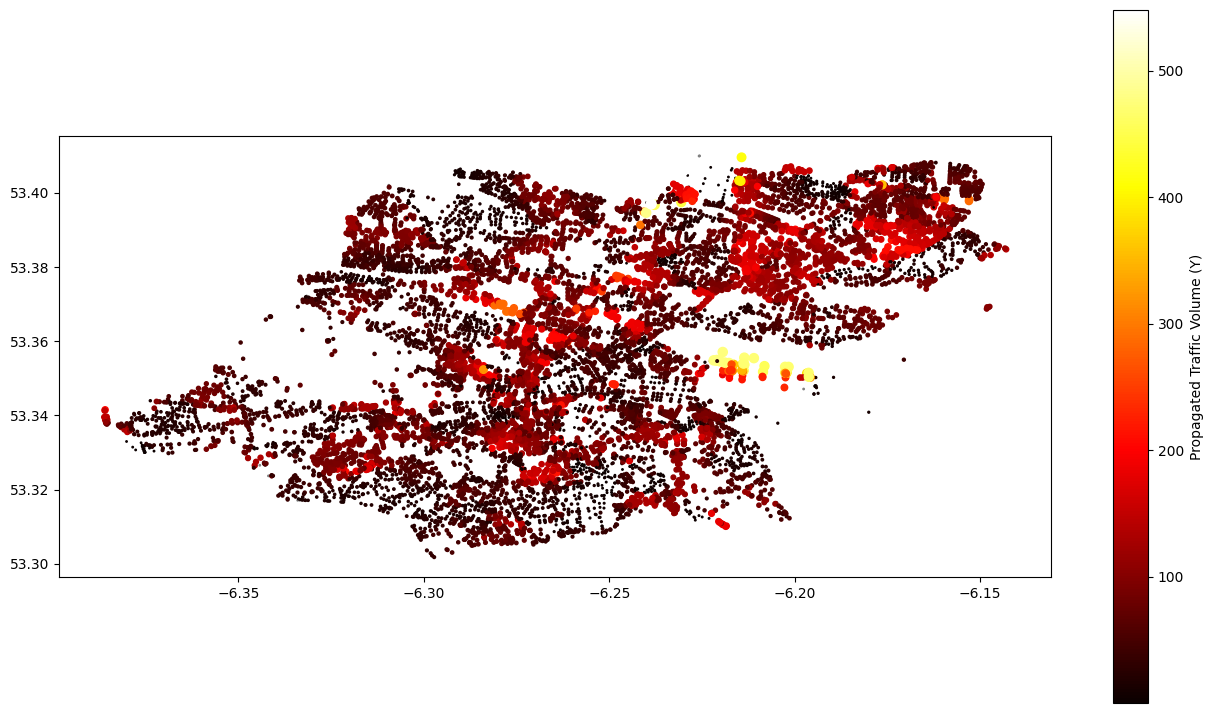

In [77]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.wkt import loads
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors # Import for colormap normalization
import matplotlib # Import matplotlib

# Assuming 'nodes' is a DataFrame with 'x' and 'y' columns for coordinates
# Create a GeoDataFrame for the nodes
nodes_geometry = gpd.points_from_xy(nodes['x'], nodes['y'])
visualnodes = gpd.GeoDataFrame(nodes, geometry=nodes_geometry)

# Create a colormap for the Y values
cmap = matplotlib.colormaps.get_cmap('hot') # Get the colormap object

# Normalize the non-zero Y values to the colormap range
non_zero_Y = Y[Y != 0]
norm = mcolors.Normalize(vmin=non_zero_Y.min() if non_zero_Y.size > 0 else 0, vmax=non_zero_Y.max() if non_zero_Y.size > 0 else 1)

# Determine marker sizes based on Y values (linear scaling)
# Add a small constant to Y to ensure even zero values have a visible marker
# Scale the values to a reasonable range for markersize
min_marker_size = 1 # Minimum marker size for nodes with zero or very low Y
max_marker_size = 50 # Maximum marker size for nodes with high Y
scaled_marker_sizes = min_marker_size + (Y / Y.max()) * (max_marker_size - min_marker_size)


# Now plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(16, 9)) # Increase figure size

# Plot nodes with zero Y values (using scaled marker size)
visualnodes[Y == 0].plot(ax=ax, markersize=scaled_marker_sizes[Y == 0], color='gray', zorder=2)

# Plot nodes with non-zero Y values, colored by the normalized Y values and scaled marker size
# Create a pandas Series for the 'column' parameter with the correct index
non_zero_Y_series = pd.Series(Y[Y != 0], index=visualnodes[Y != 0].index)
visualnodes[Y != 0].plot(ax=ax, markersize=scaled_marker_sizes[Y != 0], column=non_zero_Y_series, cmap=cmap, norm=norm, zorder=2)

# Add a color bar for the non-zero Y values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) # Needed for the colorbar to work
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Propagated Traffic Volume (Y)')


# Save the figure before showing it
plt.savefig('propagated_traffic_heatmap_scaled_nodes.png', dpi=1000) # Save with higher dpi and new filename


plt.show()